In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NHL_team_spending = pd.read_csv("NHL Total spending.csv", header=0)
NHL_team_spending
NHL_winning_percent = pd.read_csv("NHL Team winning percent.csv", header=0)
NHL_winning_percent

,Team,Average
0,BOS,83192259.8
1,CAR,86766933.4
2,NJD,72747018.2
3,VGK,94988698.2
4,TOR,95864080.4
5,COL,88490197.8
6,EDM,91988427.0
7,DAL,93234576.2
8,NYR,84726312.2
9,LAK,75107803.8


,Team,Average
0,BOS,0.646010
1,CAR,0.611068
2,NJD,0.417309
3,VGK,0.586863
4,TOR,0.593711
5,COL,0.612944
6,EDM,0.556055
7,DAL,0.521097
8,NYR,0.521655
9,LAK,0.455418


In [3]:
NHL_spending_winning = pd.merge(NHL_team_spending,NHL_winning_percent, on='Team')
NHL_spending_winning.set_index('Team', inplace=True)
NHL_spending_winning

,Average _x,Average _y
Team,,
BOS,83192259.8,0.646010
CAR,86766933.4,0.611068
NJD,72747018.2,0.417309
VGK,94988698.2,0.586863
TOR,95864080.4,0.593711
COL,88490197.8,0.612944
EDM,91988427.0,0.556055
DAL,93234576.2,0.521097
NYR,84726312.2,0.521655


In [4]:
NHL_spending_winning = pd.DataFrame(NHL_spending_winning)

Text(0.5, 0, 'Average Team Spending')

Text(0, 0.5, 'Average Winning Percentage')

Text(0.5, 1.0, 'NHL Team Spending vs. Winning Percentage')

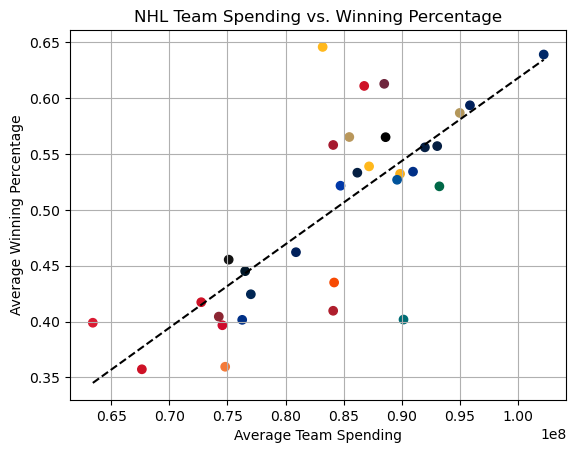

<Figure size 640x480 with 0 Axes>

In [5]:
from scipy.optimize import curve_fit

NHL_spending_winning = pd.merge(NHL_team_spending, NHL_winning_percent, on='Team')
NHL_spending_winning.set_index('Team', inplace=True)

x_data = NHL_spending_winning['Average _x']
y_data = NHL_spending_winning['Average _y']

team_colors = {
    'BOS': '#FFB81C',
    'CAR': '#CE1126',
    'NJD': '#CE1126',
    'VGK': '#B4975A',
    'TOR': '#00205B',
    'COL': '#6F263D',
    'EDM': '#041E42',
    'DAL': '#006847',
    'NYR': '#0038A8',
    'LAK': '#111111',
    'MIN': '#A6192E',
    'SEA': '#001628',
    'TBL': '#002868',
    'WPG': '#041E42',
    'CGY': '#FAAF19',
    'NYI': '#00539B',
    'FLA': '#B9975B',
    'NSH': '#FFB81C',
    'BUF': '#003087',
    'PIT': '#000000',
    'OTT': '#DA1A32',
    'VAN': '#00205B',
    'STL': '#002F87',
    'WAS': '#041E42',
    'DET': '#CE1126',
    'PHI': '#F74902',
    'ARI': '#8C2633',
    'MTL': '#AF1E2D',
    'SJS': '#006D75',
    'CHI': '#CF0A2C',
    'CBJ': '#002654',
    'ANA': '#F47A38',
    
}


def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

params, _ = curve_fit(quadratic_func, x_data, y_data)

x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = quadratic_func(x_curve, *params)

plt.scatter(x_data, y_data, c=[team_colors.get(team, '#000000') for team in NHL_spending_winning.index], label='Data')

plt.plot(x_curve, y_curve, color='black', linestyle='--', label='Quadratic Fit')

plt.xlabel('Average Team Spending')
plt.ylabel('Average Winning Percentage')
plt.title('NHL Team Spending vs. Winning Percentage')
plt.grid(True)
plt.show()

plt.savefig('NHL_spending_winning_chart.png', format='png')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Payroll', ylabel='Wpercent'>

Text(104383200, 0.56097561, '2018')

Text(95221620, 0.414285714, '2019')

Text(86639546, 0.375, '2020')

Text(86010768, 0.390243902, '2021')

Text(78487516, 0.268292683, '2022')

Text(0.5, 0, 'SJS Payroll')

Text(0, 0.5, 'SJS Winning Percentage')

Text(0.5, 1.0, 'SJS Payroll vs. Winning Percentage Over Seasons')

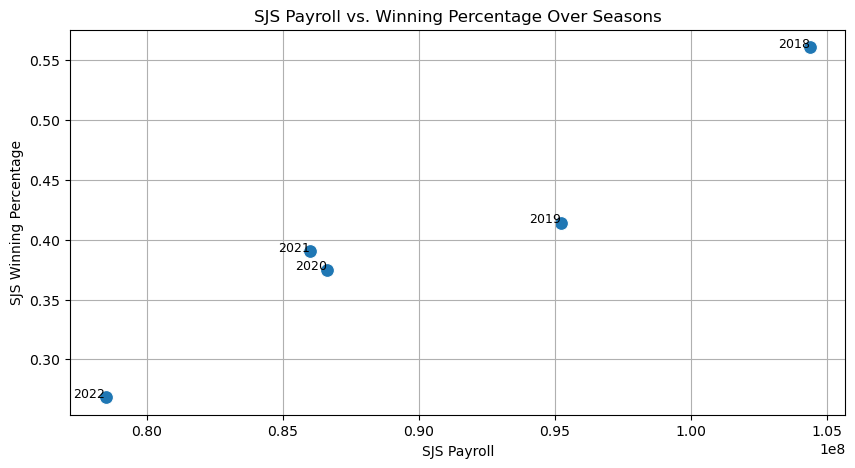

In [22]:
SJS_payroll = {
    'Team': ['SJS'],
    '2022': [78487516],
    '2021': [86010768],
    '2020': [86639546],
    '2019': [95221620],
    '2018': [104383200]
}

SJS_Wpercent = {
    'Team': ['SJS'],
    '2022': [0.268292683],
    '2021': [0.390243902],
    '2020': [0.375],
    '2019': [0.414285714],
    '2018': [0.56097561]
}

df1 = pd.DataFrame(SJS_payroll)
df2 = pd.DataFrame(SJS_Wpercent)

df1.set_index('Team', inplace=True)
df2.set_index('Team', inplace=True)

df1 = df1.transpose()
df2 = df2.transpose()

df1.columns = ['Payroll']
df2.columns = ['Wpercent']

df = pd.merge(df1, df2, left_index=True, right_index=True)

df = df.iloc[::-1]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Payroll', y='Wpercent', s=100)

for i in range(len(df)):
    plt.text(df['Payroll'][i], df['Wpercent'][i], df.index[i], fontsize=9, ha='right')

plt.xlabel('SJS Payroll')
plt.ylabel('SJS Winning Percentage')
plt.title('SJS Payroll vs. Winning Percentage Over Seasons')

plt.grid(True)
plt.show()


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Payroll', ylabel='Wpercent'>

Text(83377006, 0.597560976, '2018')

Text(75754650, 0.628571429, '2019')

Text(78198128, 0.589285714, '2020')

Text(84501102, 0.62195122, '2021')

Text(94130413, 0.792682927, '2022')

Text(0.5, 0, 'BOS Payroll')

Text(0, 0.5, 'BOS Winning Percentage')

Text(0.5, 1.0, 'BOS Payroll vs. Winning Percentage Over Seasons')

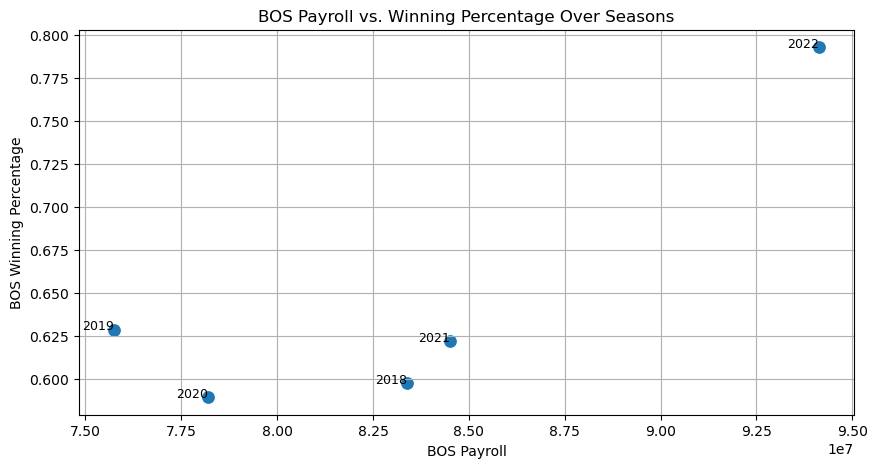

In [25]:
BOS_payroll = {
    'Team': ['BOS'],
    '2022': [94130413],
    '2021': [84501102],
    '2020': [78198128],
    '2019': [75754650],
    '2018': [83377006]
}

BOS_Wpercent = {
    'Team': ['BOS'],
    '2022': [0.792682927],
    '2021': [0.62195122],
    '2020': [0.589285714],
    '2019': [0.628571429],
    '2018': [0.597560976]
}

df1 = pd.DataFrame(BOS_payroll)
df2 = pd.DataFrame(BOS_Wpercent)

df1.set_index('Team', inplace=True)
df2.set_index('Team', inplace=True)

df1 = df1.transpose()
df2 = df2.transpose()

df1.columns = ['Payroll']
df2.columns = ['Wpercent']

df = pd.merge(df1, df2, left_index=True, right_index=True)

df = df.iloc[::-1]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Payroll', y='Wpercent', s=100)

for i in range(len(df)):
    plt.text(df['Payroll'][i], df['Wpercent'][i], df.index[i], fontsize=9, ha='right')

plt.xlabel('BOS Payroll')
plt.ylabel('BOS Winning Percentage')
plt.title('BOS Payroll vs. Winning Percentage Over Seasons')

plt.grid(True)
plt.show()
